<a href="https://colab.research.google.com/github/Oghalemichael/Data-Fire-works/blob/main/EPL_Football_Match_Prediction__Part_1_Web_Scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Welcome to EPL Football Match Prediction Notebook**

This project is divided into two parts - 'Web scrapping and data collectio' and 'actual prediction'.

We will start with the web scrapping part here. The url for scrapping will be 'https://fbref.com/en/comps/9/Premier-League-Stats'


Firt we import the required modules

In [ ]:
import requests
import time
import pandas as pd
from bs4 import BeautifulSoup

In [ ]:
#use requests to get data from the website and parse the data using BeautifulSoup
url = 'https://fbref.com/en/comps/9/Premier-League-Stats'
data = requests.get(url)
soup = BeautifulSoup(data.text)


In [ ]:
#use CSS selectors to access the required table with class = 'stats_table'
standings_table = soup.select('table.stats_table')[0]
standings_table


<table class="stats_table sortable min_width" data-cols-to-freeze=",2" id="results111601_overall"> <caption>League Table Table</caption> <colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup> <thead> <tr> <th aria-label="Rk" class=" poptip sort_default_asc center" data-stat="rank" data-tip="&lt;strong&gt;Squad finish in competition&lt;/strong&gt;&lt;br&gt;Finish within the league or competition.&lt;br&gt;For knockout competitions may show final round reached.&lt;br&gt;Colors and arrows represent promotion/relegation or qualifiation for continental cups.&lt;br&gt;Trophy indicates team won league whether by playoffs or by leading the table.&lt;br&gt;Star indicates topped table in league USING another means of naming champion." scope="col">Rk</th> <th aria-label="Squad" class=" poptip sort_default_asc center" data-stat="squad" scope="col">Squad</th> <th aria-label="MP" class=" poptip center" data-stat="games" data-

In [ ]:
# All the required links are 'a' tags. Find_all
links = standings_table.find_all('a')
links[0:9]

[<a href="/en/squads/b8fd03ef/Manchester-City-Stats">Manchester City</a>,
 <a href="/en/players/e46012d4/Kevin-De-Bruyne">Kevin De Bruyne</a>,
 <a href="/en/players/3bb7b8b4/Ederson">Ederson</a>,
 <a href="/en/squads/822bd0ba/Liverpool-Stats">Liverpool</a>,
 <a href="/en/players/e342ad68/Mohamed-Salah">Mohamed Salah</a>,
 <a href="/en/players/7a2e46a8/Alisson">Alisson</a>,
 <a href="/en/squads/cff3d9bb/Chelsea-Stats">Chelsea</a>,
 <a href="/en/players/9674002f/Mason-Mount">Mason Mount</a>,
 <a href="/en/players/33887998/Edouard-Mendy">Edouard Mendy</a>]

In [ ]:
#get href from the 'a' tags
links = [l.get('href') for l in links]
links[0:5]

['/en/squads/b8fd03ef/Manchester-City-Stats',
 '/en/players/e46012d4/Kevin-De-Bruyne',
 '/en/players/3bb7b8b4/Ederson',
 '/en/squads/822bd0ba/Liverpool-Stats',
 '/en/players/e342ad68/Mohamed-Salah']

In [ ]:
#narrow down to the links that has '/squad' with the help of list comprehension
links = [l for l in links if '/squads/' in l]
links[0:5]

['/en/squads/b8fd03ef/Manchester-City-Stats',
 '/en/squads/822bd0ba/Liverpool-Stats',
 '/en/squads/cff3d9bb/Chelsea-Stats',
 '/en/squads/361ca564/Tottenham-Hotspur-Stats',
 '/en/squads/18bb7c10/Arsenal-Stats']

In [ ]:
# make the urls complete by adding 'https://fbref.com' to all the links above
team_urls = [f'https://fbref.com{l}' for l in links][0]
team_urls

'https://fbref.com/en/squads/b8fd03ef/Manchester-City-Stats'

Extract Match Stats Using requests and pandas


Now, we need to access the link per team, starting with the first team - Manchester City. 
We will also read the result we get from the get request directly to a data frame using read_html

In [ ]:
data = requests.get(team_urls)

matches = pd.read_html(data.text, match = 'Scores & Fixtures')
matches[0].head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
0,2021-08-07,17:15,Community Shield,FA Community Shield,Sat,Neutral,L,0,1,Leicester City,NaN,NaN,57,NaN,Fernandinho,4-3-3,Paul Tierney,Match Report,NaN
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0,1,Tottenham,1.9,1.3,64,58262.0,Fernandinho,4-3-3,Anthony Taylor,Match Report,NaN
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5,0,Norwich City,2.7,0.1,67,51437.0,İlkay Gündoğan,4-3-3,Graham Scott,Match Report,NaN
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5,0,Arsenal,3.8,0.1,80,52276.0,İlkay Gündoğan,4-3-3,Martin Atkinson,Match Report,NaN
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1,0,Leicester City,2.9,0.8,61,32087.0,İlkay Gündoğan,4-3-3,Paul Tierney,Match Report,NaN


We still need to get more data using the shooting button.
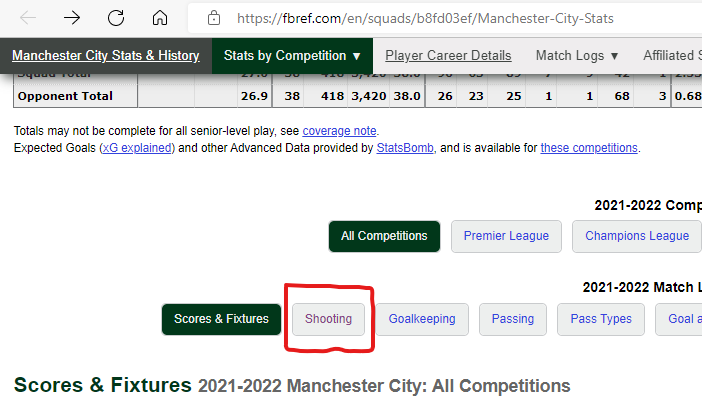

In [ ]:
links_ = BeautifulSoup(data.text).find_all('a')

shooting_link = [link.get('href') for link in links_]
shooting_link = [link for link in shooting_link if link and 'all_comps/shooting/' in link][0]
shooting_link

'/en/squads/b8fd03ef/2021-2022/matchlogs/all_comps/shooting/Manchester-City-Match-Logs-All-Competitions'

Get shooting page

In [ ]:
# make url complete and send a get request
shooting_page = requests.get(f'https://fbref.com{shooting_link}')

# read response to data frame using read_html
shooting_data = pd.read_html(shooting_page.text, match='Shooting')



In [ ]:
shooting = shooting_data[0]
shooting.head()

For Manchester City                                                     \
                 Date   Time              Comp                Round  Day   
0          2021-08-07  17:15  Community Shield  FA Community Shield  Sat   
1          2021-08-15  16:30    Premier League          Matchweek 1  Sun   
2          2021-08-21  15:00    Premier League          Matchweek 2  Sat   
3          2021-08-28  12:30    Premier League          Matchweek 3  Sat   
4          2021-09-11  15:00    Premier League          Matchweek 4  Sat   

                                         ... Standard               Expected  \
     Venue Result GF GA        Opponent  ...     Dist   FK PK PKatt       xG   
0  Neutral      L  0  1  Leicester City  ...      NaN  NaN  0     0      NaN   
1     Away      L  0  1       Tottenham  ...     16.9  1.0  0     0      1.9   
2     Home      W  5  0    Norwich City  ...     17.3  1.0  0     0      2.7   
3     Home      W  5  0         Arsenal  ...     14.3  0.0  0     0      3.8   
4     Away      W  1  0  Leicester City  ...     14.0  0.0  0     0      2.9   

                            Unnamed: 25_level_0  
  npxG npxG/Sh G-xG np:G-xG        Match Report  
0  NaN     NaN  NaN     NaN        Match Report  
1  1.9    0.11 -1.9    -1.9        Match Report  
2  2.7    0.17  1.3     1.3        Match Report  
3  3.8    0.15  1.2     1.2        Match Report  
4  2.9    0.12 -1.9    -1.9        Match Report  

[5 rows x 26 columns]

Drop top index level.

You can see that the columns are in multi levels. we will now use the droplevel() function to drop the outer level.

In [ ]:
shooting.columns = shooting.columns.droplevel()
shooting.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Match Report
0,2021-08-07,17:15,Community Shield,FA Community Shield,Sat,Neutral,L,0,1,Leicester City,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,Match Report
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0,1,Tottenham,...,16.9,1.0,0,0,1.9,1.9,0.11,-1.9,-1.9,Match Report
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5,0,Norwich City,...,17.3,1.0,0,0,2.7,2.7,0.17,1.3,1.3,Match Report
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5,0,Arsenal,...,14.3,0.0,0,0,3.8,3.8,0.15,1.2,1.2,Match Report
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1,0,Leicester City,...,14.0,0.0,0,0,2.9,2.9,0.12,-1.9,-1.9,Match Report


Merge the shooting and the matches df into one df

In [ ]:
team_data = matches[0].merge(shooting[['Date', 'Sh', 'SoT', 'Dist', 'FK', 'PK', 'PKatt']], on='Date')
team_data.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Formation,Referee,Match Report,Notes,Sh,SoT,Dist,FK,PK,PKatt
0,2021-08-07,17:15,Community Shield,FA Community Shield,Sat,Neutral,L,0,1,Leicester City,...,4-3-3,Paul Tierney,Match Report,NaN,12,3,NaN,NaN,0,0
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0,1,Tottenham,...,4-3-3,Anthony Taylor,Match Report,NaN,18,4,16.9,1.0,0,0
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5,0,Norwich City,...,4-3-3,Graham Scott,Match Report,NaN,16,4,17.3,1.0,0,0
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5,0,Arsenal,...,4-3-3,Martin Atkinson,Match Report,NaN,25,10,14.3,0.0,0,0
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1,0,Leicester City,...,4-3-3,Paul Tierney,Match Report,NaN,25,8,14.0,0.0,0,0


In [ ]:
print(matches[0].shape)
print(shooting.shape)
print(team_data.shape)

(58, 19)
(59, 26)
(58, 25)


Extra rows will be dropped later in the project

It is now time to SCALE UP these codes through years 2020 to 2022 and through all the Premier League Teams. We are going to use a nested for-loop for this purpose.

In [ ]:
# create a list of years starting from most recent - 2022
years = list(range(2022,2020,-1))
years


[2022, 2021]

In [ ]:
#Initialize a list called all_mataches. This will contain all the required df
all_matches = []

In [ ]:
standing_url = 'https://fbref.com/en/comps/9/Premier-League-Stats'

In [ ]:
for year in years:
  data = requests.get(standing_url)
  soup = BeautifulSoup(data.text)
  standings_table = soup.select('table.stats_table')[0]

  links = standings_table.find_all('a')
  links = [l.get('href') for l in links]
  links = [l for l in links if '/squads/' in l]
  team_urls = [f'https://fbref.com{l}' for l in links]

  previous_season = soup.select('a.prev')[0].get('href')
  standing_url = f'https://fbref.com{previous_season}'

  for team_url in team_urls:
    team_name = team_url.split('/')[-1].replace('-Stats', '').replace('-',' ')

    data = requests.get(team_url)
    matches = pd.read_html(data.text, match='Scores & Fixtures')[0]

    links_ = BeautifulSoup(data.text).find_all('a')
    shooting_link = [link.get('href') for link in links_]
    shooting_link = [link for link in shooting_link if link and 'all_comps/shooting/' in link][0]
    shooting_page = requests.get(f'https://fbref.com{shooting_link}')
    shooting = pd.read_html(shooting_page.text, match='Shooting')[0]

    shooting.columns = shooting.columns.droplevel()

    try:
      team_data = matches.merge(shooting[['Date', 'Sh', 'SoT', 'Dist', 'FK', 'PK', 'PKatt']], on='Date')
    except KeyError:
      continue
    #except KeyError:
    #  continue

    team_data = team_data[team_data['Comp']=='Premier League']
    team_data['Season'] = year
    team_data['Team'] = team_name
    all_matches.append(team_data)
    time.sleep(1)



In [ ]:
type(all_matches)

list

In [ ]:
match_df = pd.concat(all_matches)

match_df.columns = [c.lower() for c in match_df.columns]

In [ ]:
match_df


,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0,1,Tottenham,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5,0,Norwich City,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5,0,Arsenal,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1,0,Leicester City,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0,0,Southampton,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Premier League,Matchweek 34,Sun,Away,L,0,4,Tottenham,...,Match Report,NaN,8.0,1.0,17.4,0.0,0.0,0.0,2021,Sheffield United
39,2021-05-08,15:00,Premier League,Matchweek 35,Sat,Home,L,0,2,Crystal Palace,...,Match Report,NaN,7.0,0.0,11.4,1.0,0.0,0.0,2021,Sheffield United
40,2021-05-16,19:00,Premier League,Matchweek 36,Sun,Away,W,1,0,Everton,...,Match Report,NaN,10.0,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United
41,2021-05-19,18:00,Premier League,Matchweek 37,Wed,Away,L,0,1,Newcastle Utd,...,Match Report,NaN,11.0,1.0,16.0,1.0,0.0,0.0,2021,Sheffield United


In [ ]:
#save in a .csv file
match_df.to_csv('matches.csv')

Watch Out for Part 2. Where we will be working with the matches.csv file to create a model for prediction of football match results.